In [3]:
import time
import numpy as np
import pandas as pd
import itertools as it
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, precision_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt

from sklearn.manifold import TSNE

import plotly.graph_objects as go

standarscaler = StandardScaler()

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
Data = pd.read_csv('https://raw.githubusercontent.com/mcuscagua/Aprendizaje_Automatico/master/Trabajo_2/Data.csv')
Data = Data.set_index('Date')
Y = Data['Class']
X = Data.drop('Class', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train_Stand = standarscaler.fit_transform(X_train)
X_test_Stand = standarscaler.transform(X_test)

In [5]:
Neurons = [x+1 for x in range(10)]
all_combinations = [[] for k in range(len(Neurons))]
for i in range(10):
    for j in range(10):
        all_combinations[i].append(tuple((i+1 for k in range(j+1))))

In [6]:
TrSCr_LC_V02 = np.ndarray((len(all_combinations), 5, len(all_combinations[0])))
TeSCr_LC_V02 = np.ndarray((len(all_combinations), 5, len(all_combinations[0])))
AUC_v02 = np.zeros((len(all_combinations), len(all_combinations[0])))
Accuracy_v02 = np.zeros((len(all_combinations), len(all_combinations[0])))

TrSCr_LC_V05 = np.ndarray((len(all_combinations), 5, len(all_combinations[0])))
TeSCr_LC_V05 = np.ndarray((len(all_combinations), 5, len(all_combinations[0])))
AUC_v05 = np.zeros((len(all_combinations), len(all_combinations[0])))
Accuracy_v05 = np.zeros((len(all_combinations), len(all_combinations[0])))

TrSCr_LC_V09 = np.ndarray((len(all_combinations), 5, len(all_combinations[0])))
TeSCr_LC_V09 = np.ndarray((len(all_combinations), 5, len(all_combinations[0])))
AUC_v09 = np.zeros((len(all_combinations), len(all_combinations[0])))
Accuracy_v09 = np.zeros((len(all_combinations), len(all_combinations[0])))

In [7]:
start_time = time.time()
for i in range(len(all_combinations)):
    for j in range(len(all_combinations[i])):
        #--------- LR = 0.2 ---------#
        MLPC = MLPClassifier(hidden_layer_sizes=all_combinations[i][j],
                                 learning_rate = 'constant',
                                 learning_rate_init = 0.2,
                                 random_state=0)

        MLPP = MLPClassifier(hidden_layer_sizes=all_combinations[i][j],
                                 learning_rate = 'constant',
                                 learning_rate_init = 0.2,
                                 random_state=0)

        MLPC.fit(X_train_Stand, Y_train)
        y_score = MLPC.predict_proba(X_test_Stand)
        y_pred = MLPC.predict(X_test_Stand)

        train_sizes, train_scores, test_scores = learning_curve(MLPP, X, Y)

        TSZ_LC_V02 = train_sizes
        TrSCr_LC_V02[i,:,j] = np.median(train_scores, axis=1)
        TeSCr_LC_V02[i,:,j] = np.median(test_scores, axis=1)
        AUC_v02[i,j] = roc_auc_score(Y_test, y_pred)
        Accuracy_v02[i,j] = accuracy_score(Y_test, y_pred)

        #--------- LR = 0.5 ---------#

        MLPC = MLPClassifier(hidden_layer_sizes=all_combinations[i][j],
                                 learning_rate = 'constant',
                                 learning_rate_init = 0.5,
                                 random_state=0)

        MLPP = MLPClassifier(hidden_layer_sizes=all_combinations[i][j],
                                 learning_rate = 'constant',
                                 learning_rate_init = 0.5,
                                 random_state=0)

        MLPC.fit(X_train_Stand, Y_train)
        y_score = MLPC.predict_proba(X_test_Stand)
        y_pred = MLPC.predict(X_test_Stand)

        train_sizes, train_scores, test_scores = learning_curve(MLPP, X, Y)

        TrSCr_LC_V05[i,:,j] = np.median(train_scores, axis=1)
        TeSCr_LC_V05[i,:,j] = np.median(test_scores, axis=1)
        AUC_v05[i,j] = roc_auc_score(Y_test, y_pred)
        Accuracy_v05[i,j] = accuracy_score(Y_test, y_pred)

        #--------- LR = 0.9 ---------#

        MLPC = MLPClassifier(hidden_layer_sizes=all_combinations[i][j],
                                 learning_rate = 'constant',
                                 learning_rate_init = 0.9,
                                 random_state=0)

        MLPP = MLPClassifier(hidden_layer_sizes=all_combinations[i][j],
                                 learning_rate = 'constant',
                                 learning_rate_init = 0.9,
                                 random_state=0)

        MLPC.fit(X_train_Stand, Y_train)
        y_score = MLPC.predict_proba(X_test_Stand)
        y_pred = MLPC.predict(X_test_Stand)

        train_sizes, train_scores, test_scores = learning_curve(MLPP, X, Y)

        TrSCr_LC_V09[i,:,j] = np.median(train_scores, axis=1)
        TeSCr_LC_V09[i,:,j] = np.median(test_scores, axis=1)
        AUC_v09[i,j] = roc_auc_score(Y_test, y_pred)
        Accuracy_v09[i,j] = accuracy_score(Y_test, y_pred)

elapsed_time = time.time() - start_time
print(elapsed_time)

396.4137170314789


# Resultados

In [8]:
fig1 = go.Figure(data=[go.Surface(z=AUC_v02)])

fig1.update_layout(title='AUC Surface', autosize=True,
                   scene = dict(xaxis_title='Neurons',
                                yaxis_title='Layers',
                                zaxis_title='AUC'))
fig1.update_yaxes(tickvals=[x+30 for x in range(10)])
fig1.update_xaxes(tickvals=[x+30 for x in range(10)])

fig1.show()
fig1.write_html('AUC_02.html')

In [9]:
fig2 = go.Figure(data=[go.Surface(z=AUC_v05)])

fig2.update_layout(title='AUC Surface', autosize=True,
                   scene = dict(xaxis_title='Neurons',
                                yaxis_title='Layers',
                                zaxis_title='AUC'))
fig2.update_yaxes(tickvals=[x+30 for x in range(10)])
fig2.update_xaxes(tickvals=[x+30 for x in range(10)])

fig2.show()
fig2.write_html('AUC_05.html')

In [10]:
fig3 = go.Figure(data=[go.Surface(z=AUC_v09)])

fig3.update_layout(title='AUC Surface', autosize=True,
                   scene = dict(xaxis_title='Neurons',
                                yaxis_title='Layers',
                                zaxis_title='AUC'))
fig3.update_yaxes(tickvals=[x+30 for x in range(10)])
fig3.update_xaxes(tickvals=[x+30 for x in range(10)])

fig3.show()
fig3.write_html('AUC_09.html')

In [11]:
fig4 = go.Figure(data=[go.Surface(z=Accuracy_v02)])

fig4.update_layout(title='Accuracy Surface', autosize=True,
                   scene = dict(xaxis_title='Neurons',
                                yaxis_title='Layers',
                                zaxis_title='Accuracy'))
fig4.update_yaxes(tickvals=[x+30 for x in range(10)])
fig4.update_xaxes(tickvals=[x+30 for x in range(10)])

fig4.show()
fig4.write_html('ACC_02.html')

In [12]:
fig5 = go.Figure(data=[go.Surface(z=Accuracy_v05)])

fig5.update_layout(title='Accuracy Surface', autosize=True,
                   scene = dict(xaxis_title='Neurons',
                                yaxis_title='Layers',
                                zaxis_title='Accuracy'))
fig5.update_yaxes(tickvals=[x+30 for x in range(10)])
fig5.update_xaxes(tickvals=[x+30 for x in range(10)])

fig5.show()
fig5.write_html('ACC_05.html')

In [13]:
fig6 = go.Figure(data=[go.Surface(z=Accuracy_v09)])

fig6.update_layout(title='Accuracy Surface', autosize=True,
                   scene = dict(xaxis_title='Neurons',
                                yaxis_title='Layers',
                                zaxis_title='Accuracy'))
fig6.update_yaxes(tickvals=[x+30 for x in range(10)])
fig6.update_xaxes(tickvals=[x+30 for x in range(10)])

fig6.show()
fig6.write_html('ACC_09.html')

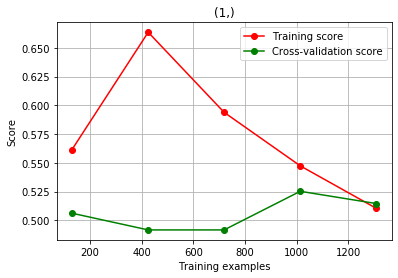

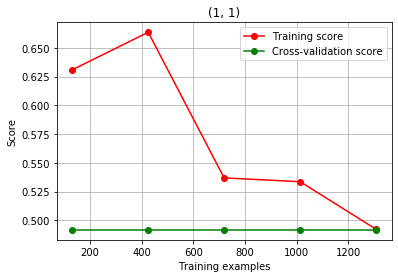

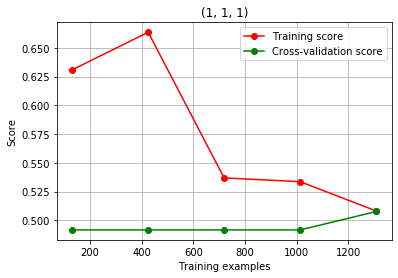

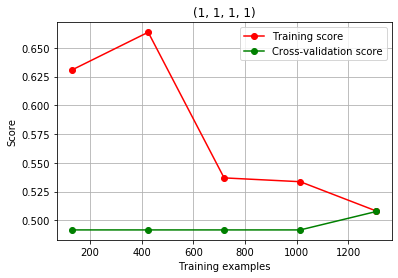

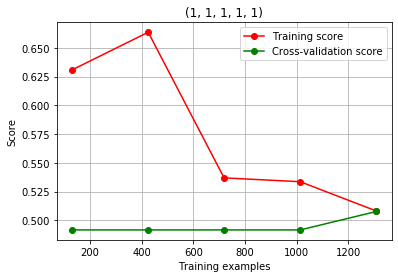

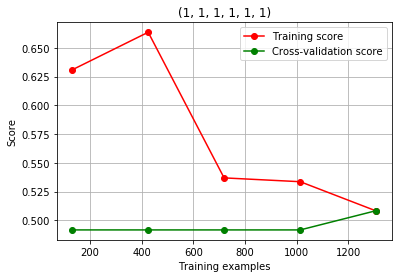

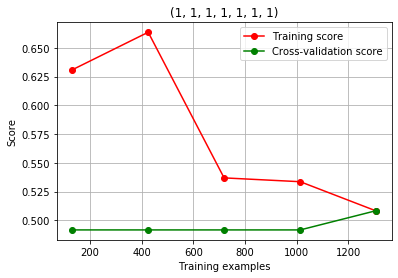

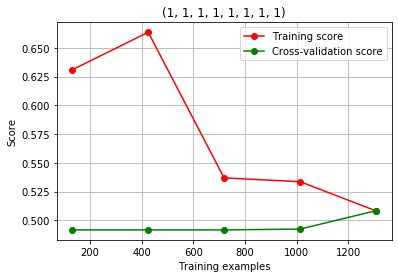

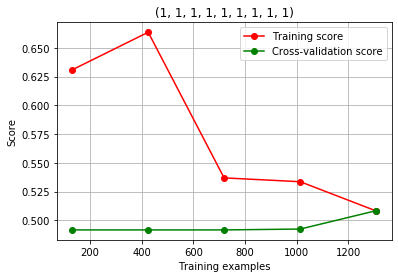

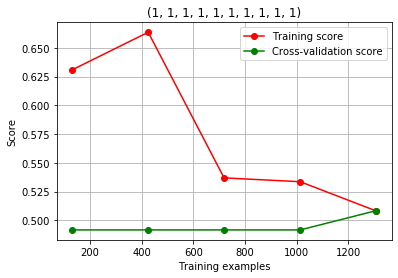

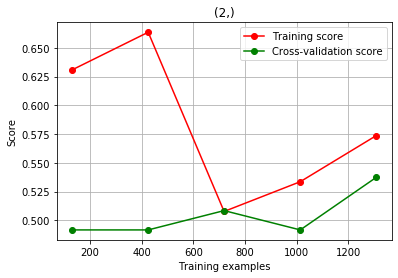

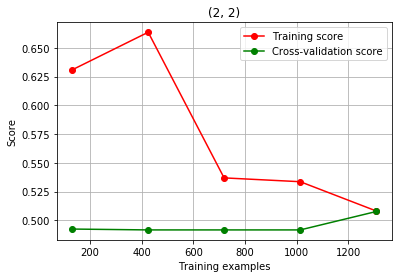

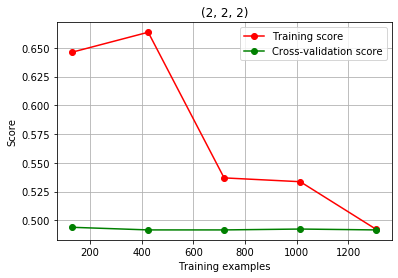

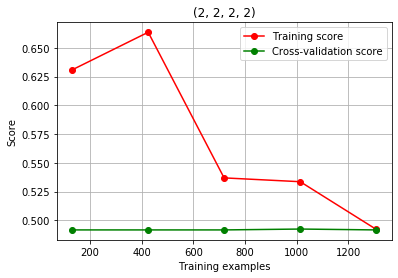

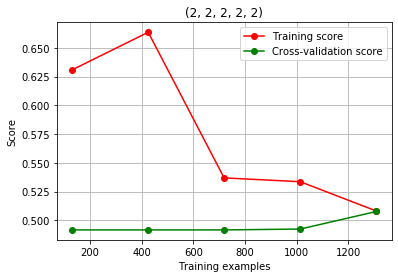

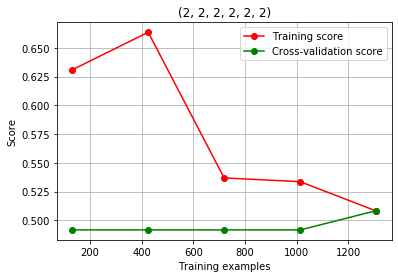

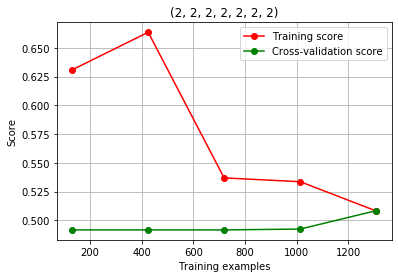

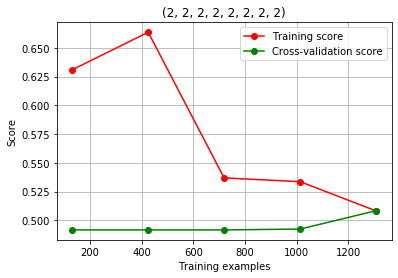

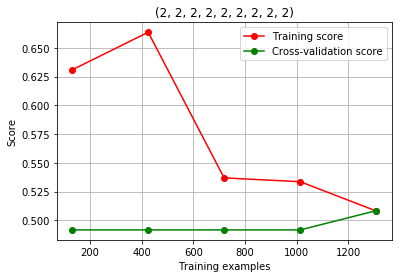

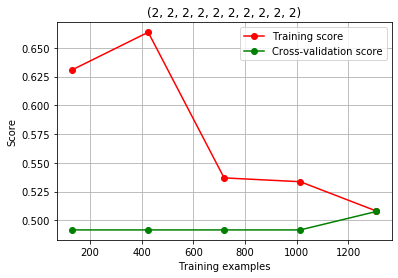

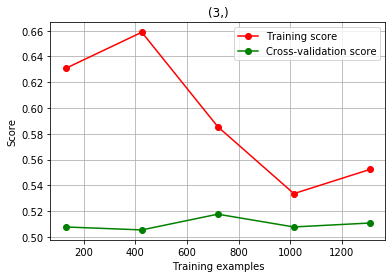

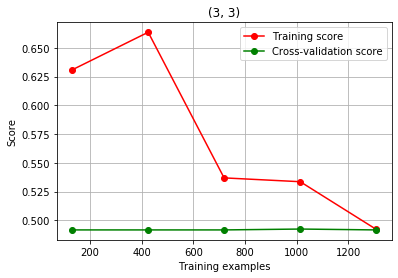

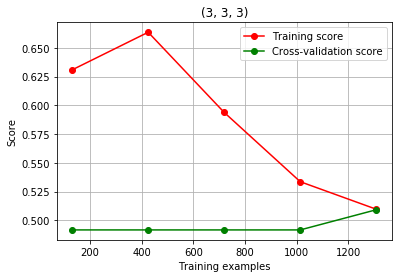

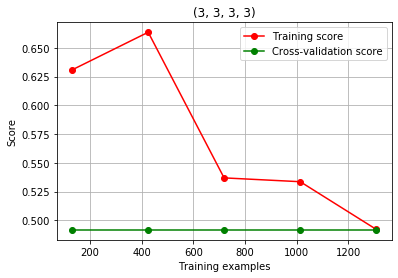

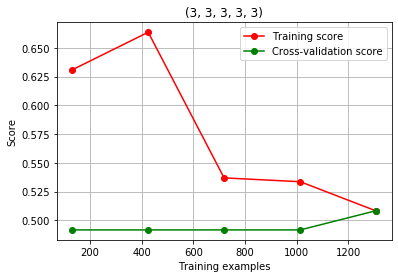

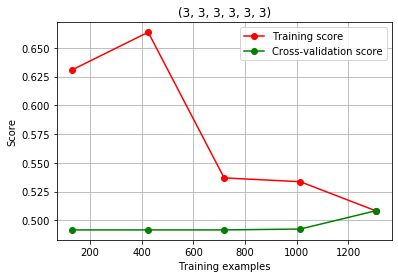

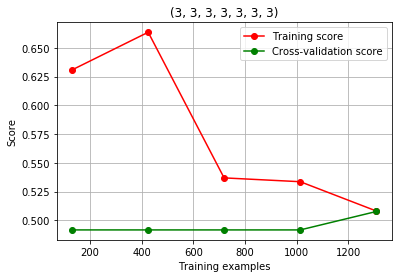

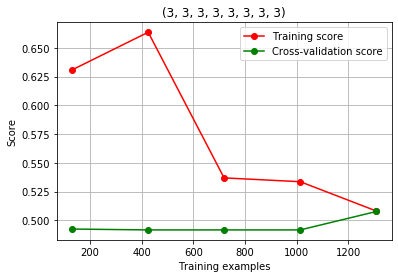

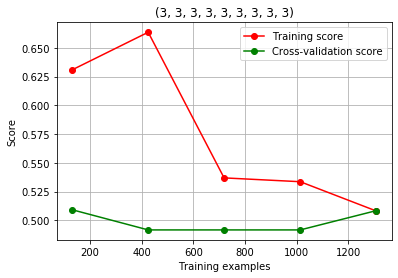

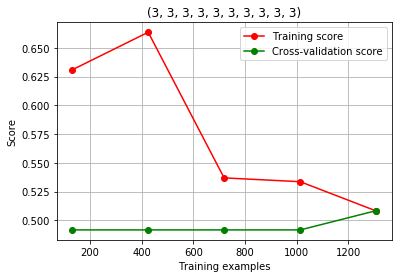

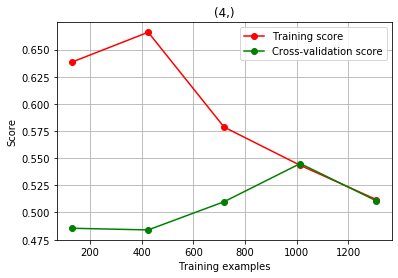

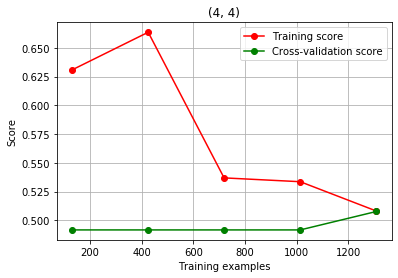

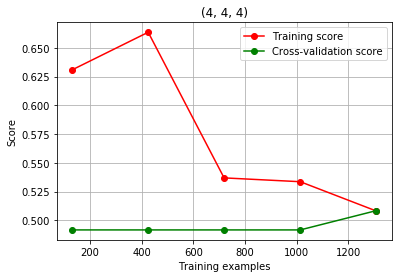

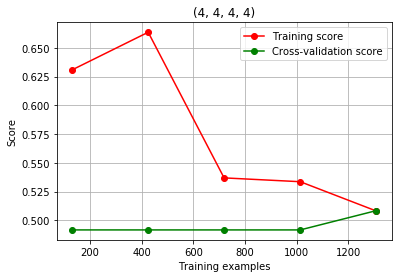

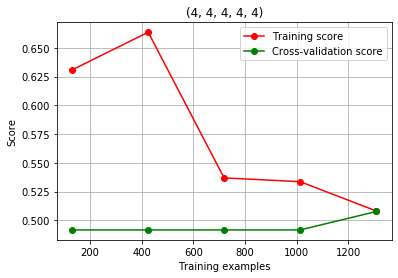

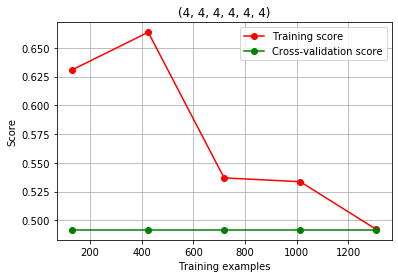

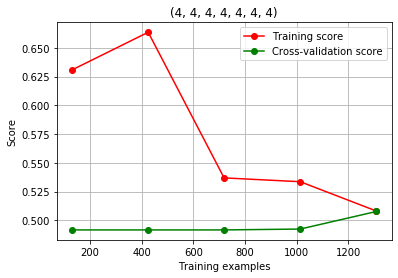

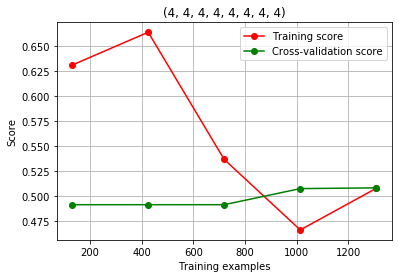

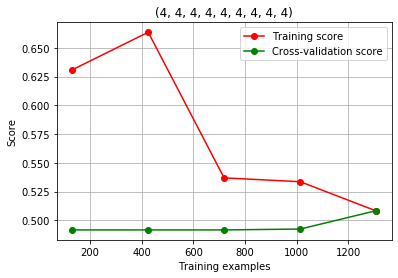

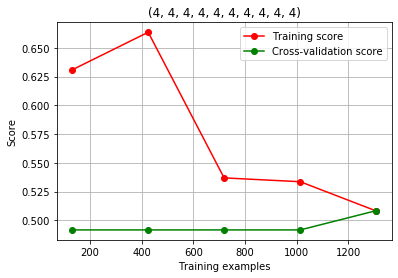

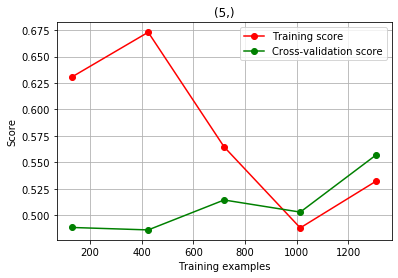

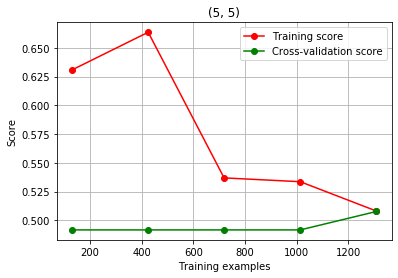

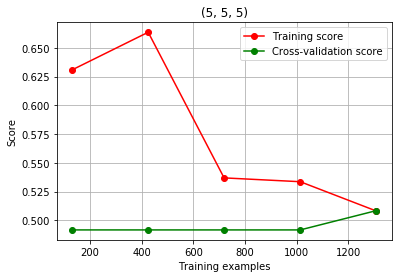

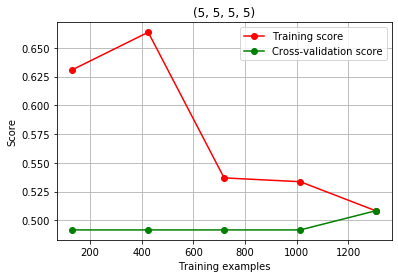

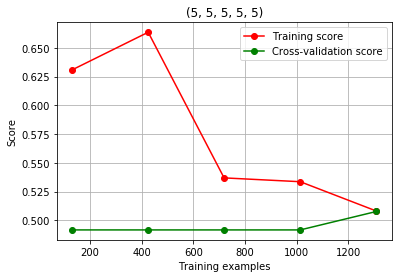

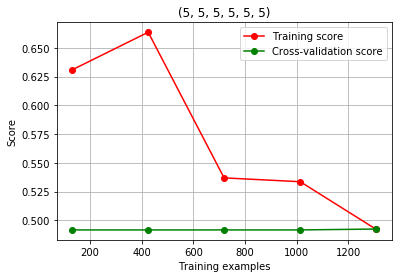

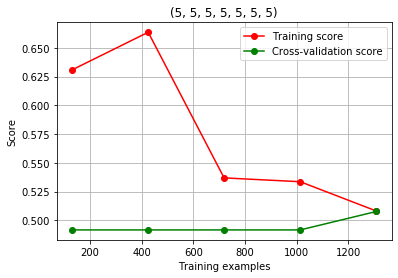

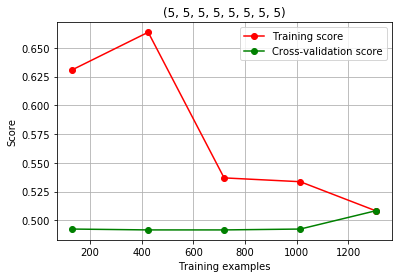

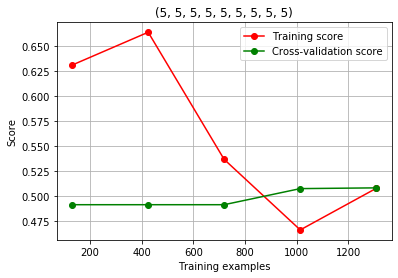

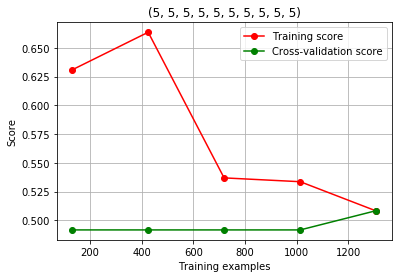

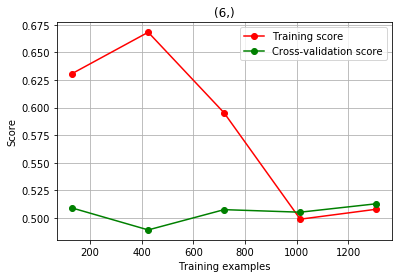

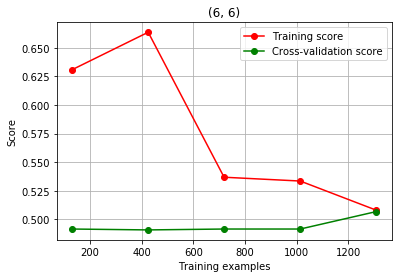

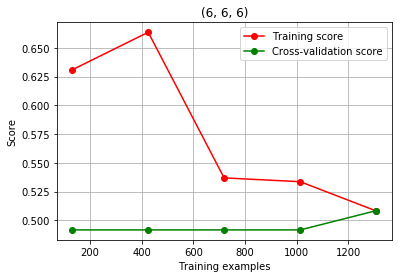

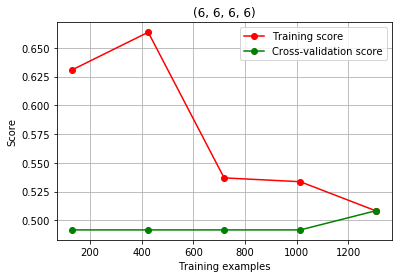

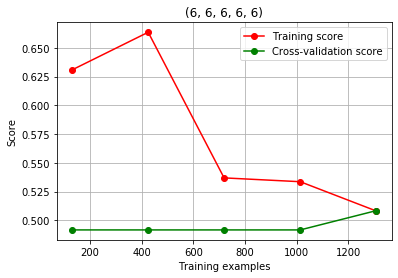

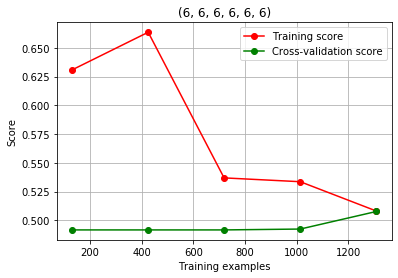

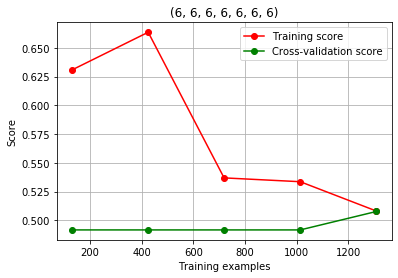

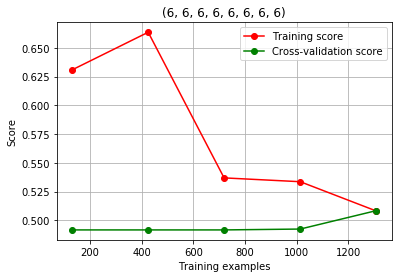

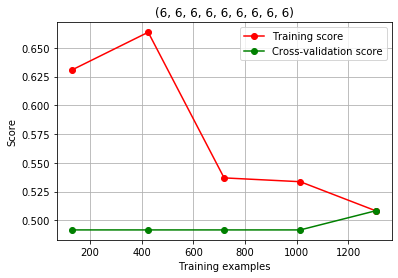

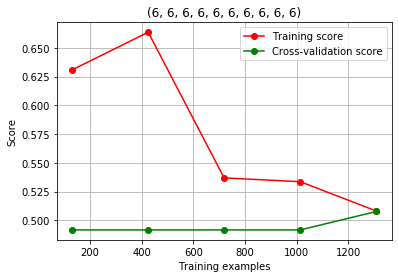

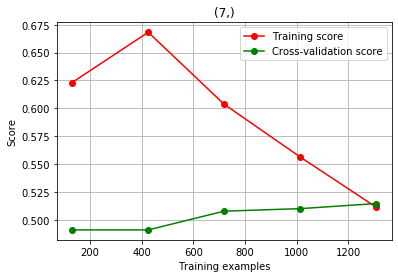

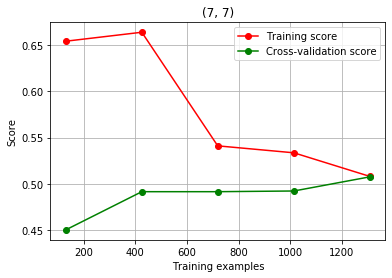

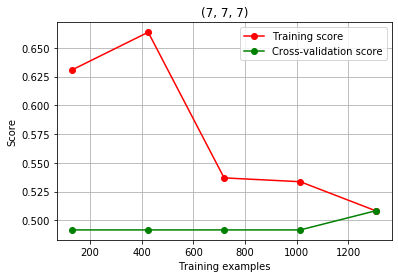

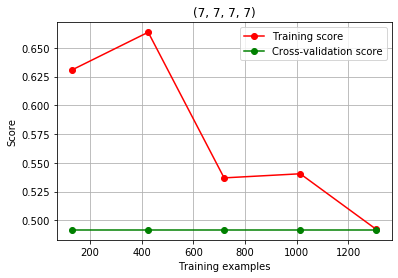

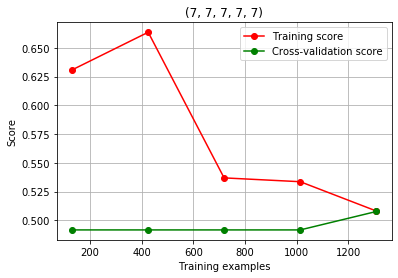

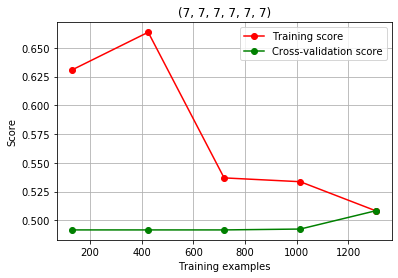

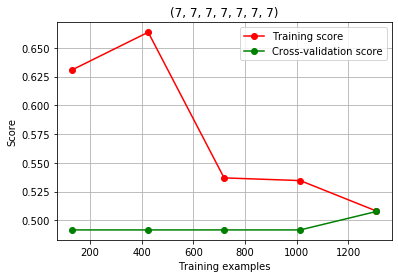

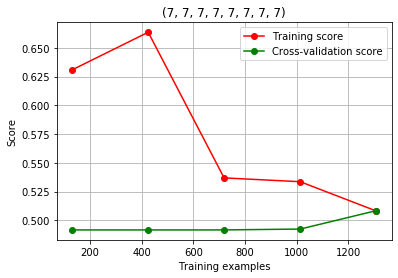

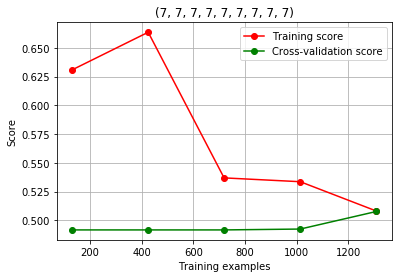

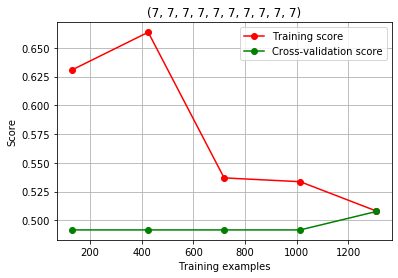

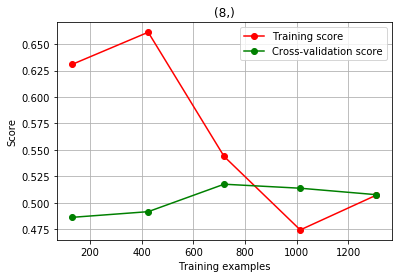

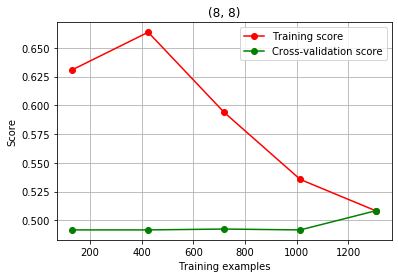

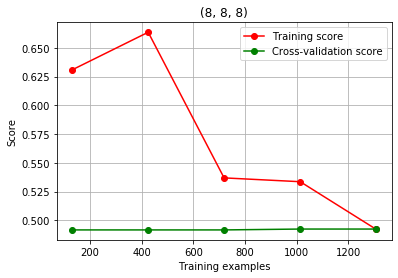

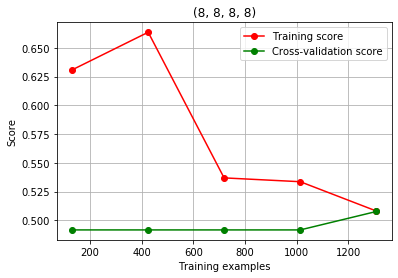

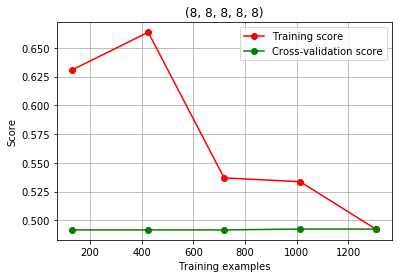

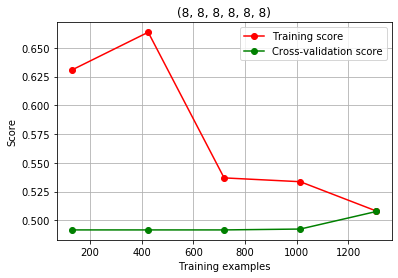

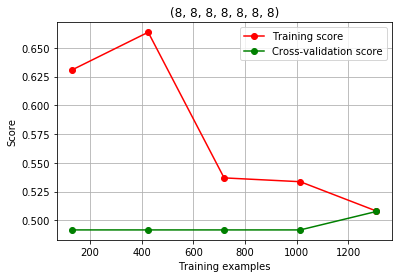

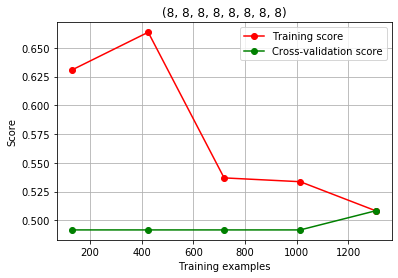

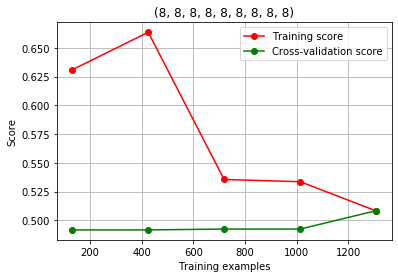

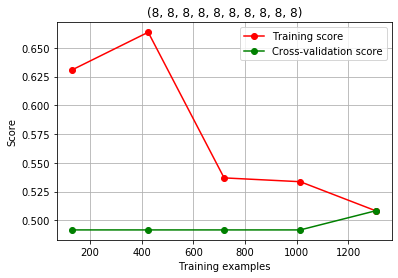

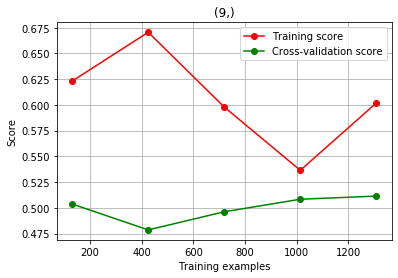

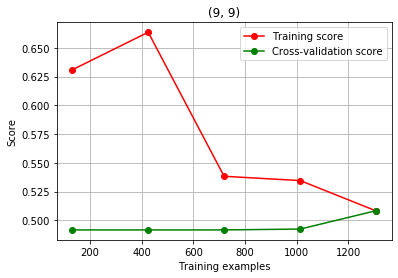

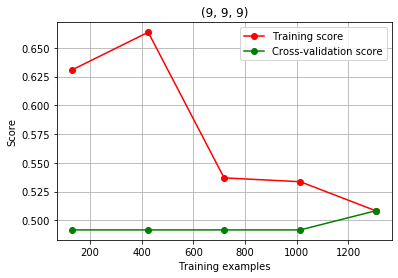

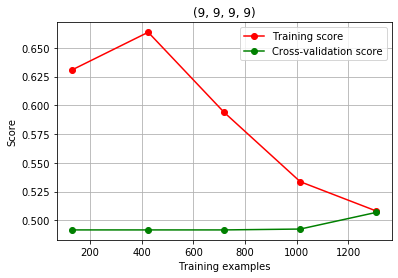

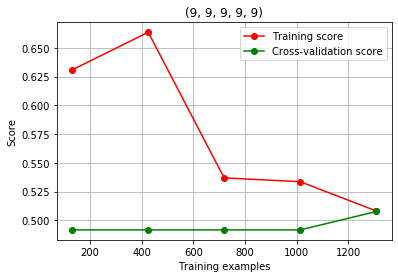

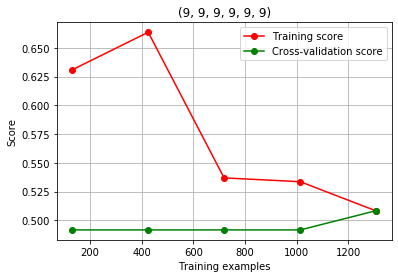

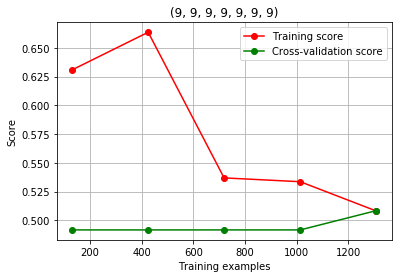

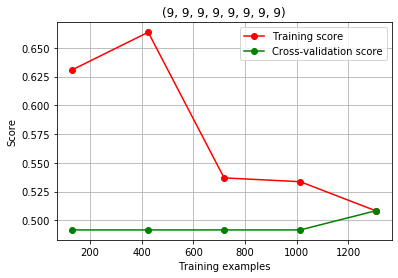

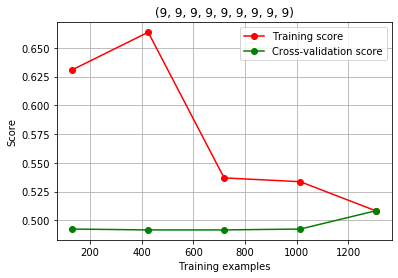

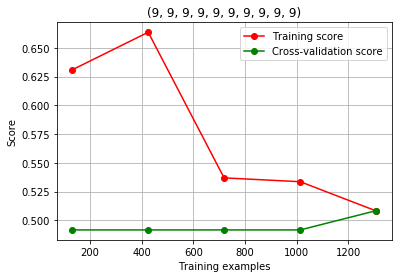

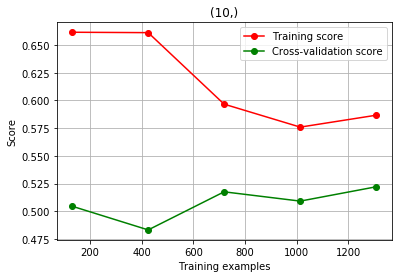

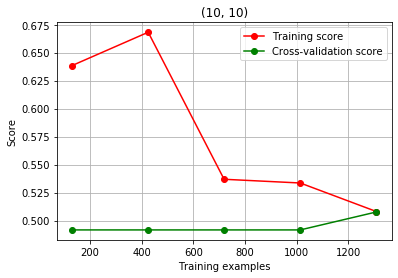

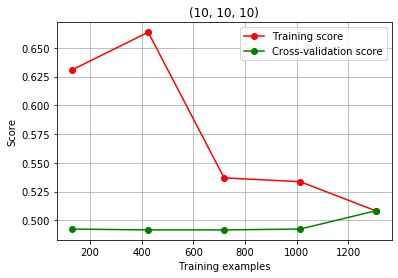

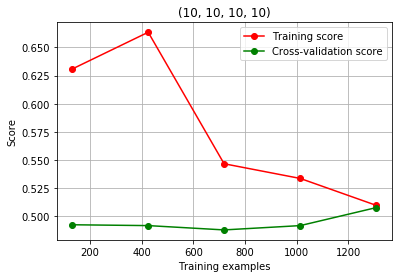

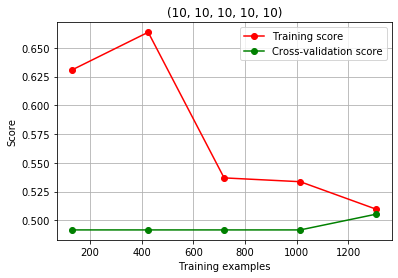

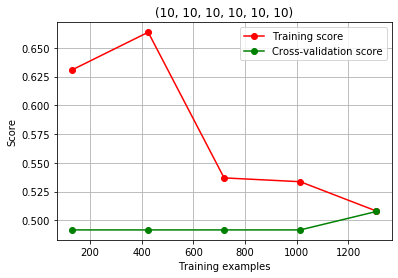

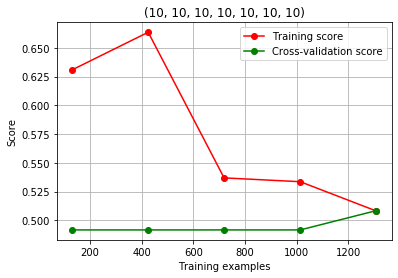

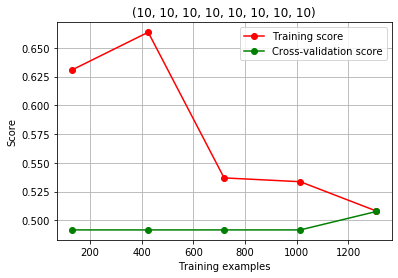

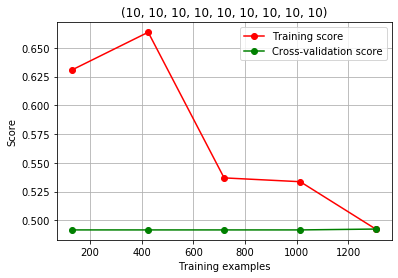

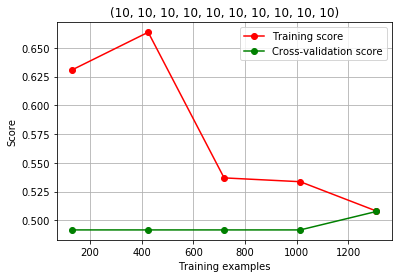

In [14]:
for i in range(10):
    for j in range(10):
        plt.figure()
        
        plt.title(str(all_combinations[i][j]))
        plt.xlabel("Training examples")
        plt.ylabel("Score")

        plt.grid()
        plt.plot(TSZ_LC_V02, TrSCr_LC_V02[i,:,j], 'o-', color="r",
                 label="Training score")
        plt.plot(TSZ_LC_V02, TeSCr_LC_V02[i,:,j], 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()